In [1]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Import Python Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import pandas_datareader.data as web
import datetime as dt
stock='^NSEI'
df1=web.DataReader('GOLDBEES.NS','yahoo',start='1996-01-01',end='2022-10-28')

In [3]:
df1.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-10-21,43.209999,42.700001,43.080002,42.730000,5502791.0,42.730000
2022-10-24,44.369999,43.070000,44.360001,43.480000,3722883.0,43.480000
2022-10-25,43.910000,43.130001,43.680000,43.169998,2942957.0,43.169998
2022-10-27,43.740002,37.599998,37.599998,43.459999,1876894.0,43.459999
2022-10-28,43.740002,43.070000,43.740002,43.279999,1956627.0,43.279999


In [4]:
df = df1[['Adj Close']]
df[['Adj Close']].tail()

,Adj Close
Date,
2022-10-21,42.730000
2022-10-24,43.480000
2022-10-25,43.169998
2022-10-27,43.459999
2022-10-28,43.279999


In [5]:
df['Prediction'] = df[['Adj Close']].shift(-15)
#print data set
print(df)

            Adj Close  Prediction
Date                             
2009-01-02  13.370000     13.6920
2009-01-05  13.155500     13.5000
2009-01-06  13.040000     13.4598
2009-01-07  13.215000     14.0000
2009-01-09  13.168900     14.0100
...               ...         ...
2022-10-21  42.730000         NaN
2022-10-24  43.480000         NaN
2022-10-25  43.169998         NaN
2022-10-27  43.459999         NaN
2022-10-28  43.279999         NaN

[3405 rows x 2 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [6]:
#Create a data set X and convert it into numpy array , which will be having actual values
X = np.array(df.drop(['Prediction'],1))
#Remove the last 15 rows
X = X[:-15]
print(X)


[[13.36999989]
 [13.15550041]
 [13.03999996]
 ...
 [43.13999939]
 [44.04999924]
 [44.27999878]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [7]:
# Create a dataset y which will be having Predicted values and convert into numpy array
y = np.array(df['Prediction'])
# Remove Last 15 rows
y = y[:-15]
print(y)

[13.69200039 13.5        13.45979977 ... 43.16999817 43.45999908
 43.27999878]


In [8]:
# Split the data into train and test with 90 & 10 % respectively
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [9]:
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html
# SVM Model
svr = SVR(kernel='rbf', C=4e3, gamma=0.02)
# Train the model 
svr.fit(x_train, y_train)

# The best possible score is 1.0
svm_confidence = svr.score(x_test, y_test)
print("svm confidence: ", svm_confidence)

svm confidence:  0.9838467913267023


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


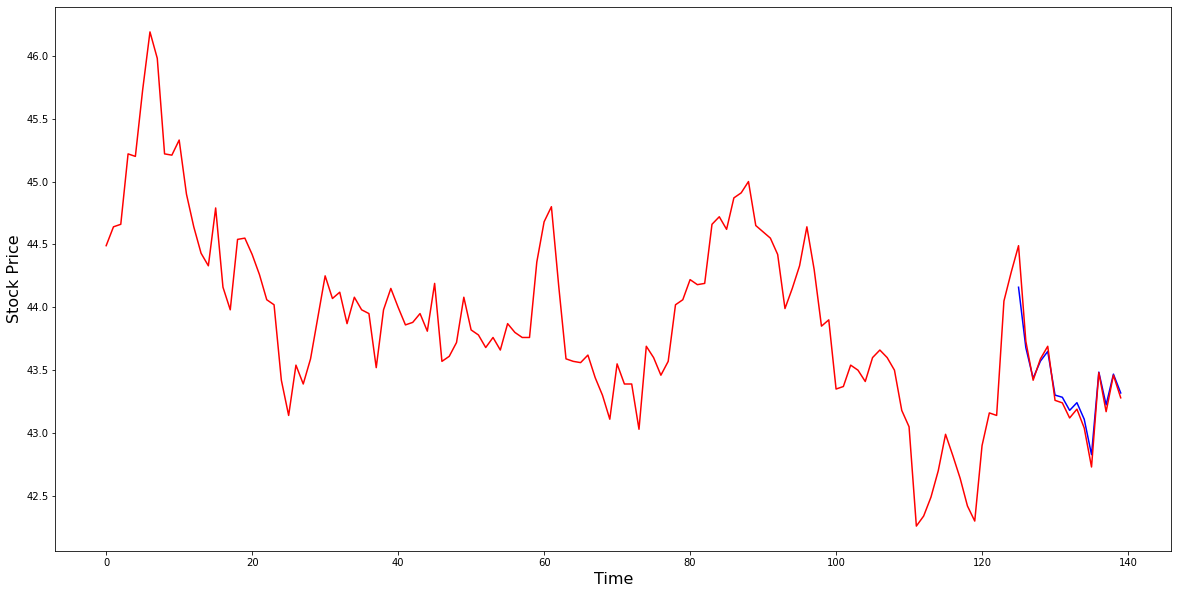

In [12]:
plt.rcParams["figure.figsize"] = (20,10)
forecast = np.array(df.drop(["Prediction"],1))[-15:]
svm_prediction = svr.predict(forecast)
z = np.zeros(len(X[3250+15:]))
z[:] = np.nan
z = np.append(z,svm_prediction)


plt.plot(z, color="b")
plt.plot(y[3250:], color='r')
plt.xlabel("Time", fontsize=16)
plt.ylabel("Stock Price", fontsize=16)
plt.show()


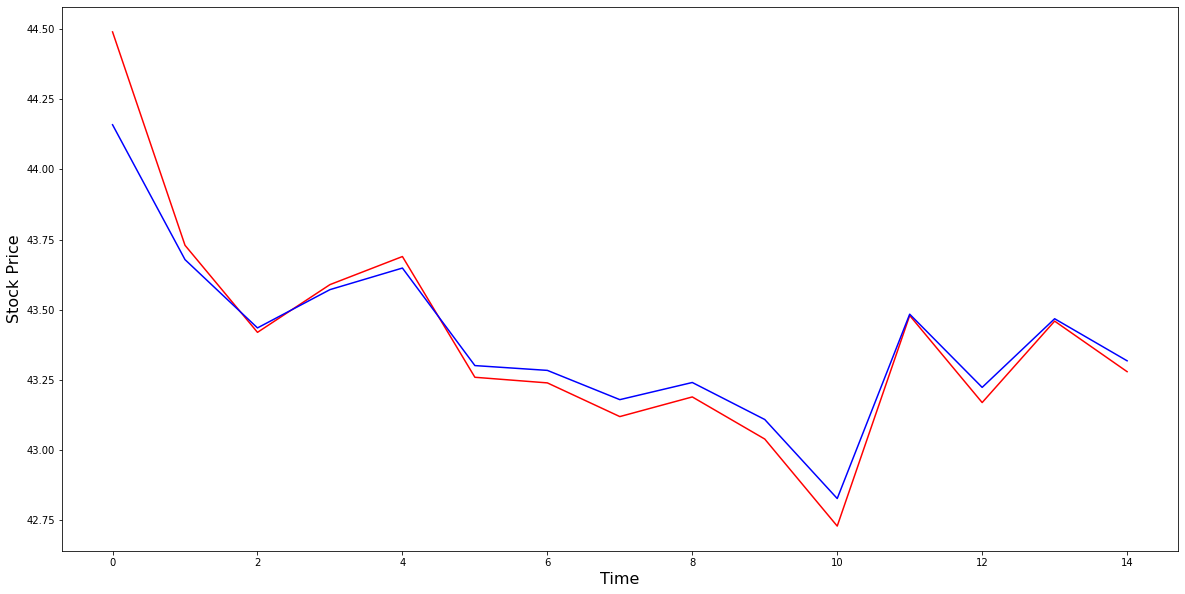

In [13]:
# support vector model predictions for the next ‘15’ days
plt.plot(forecast,color="r")
plt.plot(svm_prediction, color="b")
plt.xlabel("Time", fontsize=16)
plt.ylabel("Stock Price", fontsize=16)
plt.show()
